In [1]:
%matplotlib notebook

In [2]:
# set path test/Stock/src -> test
import os
os.chdir('../../')
os.getcwd()

'D:\\SD_python\\test'

In [3]:
# import packages
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rcParams

from collections import deque
import pandas as pd
import numpy as np
import random
from multiprocessing import Process


In [4]:
# my packages
from Indicator import get_Bolinger_Band
from Indicator import get_DMI
from Indicator import get_MACD
from Indicator import get_RSI
from get_stock_data import data_gan

# set indicator function
bolingerband = get_Bolinger_Band.fnBolingerBand
dmi = get_DMI.cal_dmi
macd = get_MACD.fnMACD
rsi = get_RSI.fnRSI

In [5]:
# set FFwriter
plt.rcParams['animation.ffmpeg_path'] ='D./Stock/req/ffmpeg-20200628-4cfcfb3-win64-static/bin/ffmpeg.exe'
FFwriter=animation.FFMpegWriter(fps=10, extra_args=['-vcodec', 'libx264'])

<IPython.core.display.Javascript object>


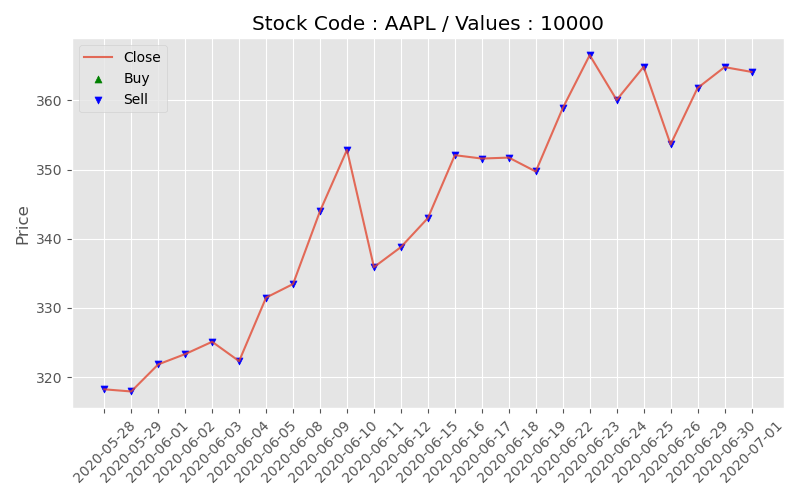

Input Stock Code : 
AAPL


In [11]:
# plt setting
plt.style.use('ggplot')
plt.ion()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlim(0,31)

# input stock code
identifier = input('Input Stock Code : \n')

# initial values for trading $ 
initial_values = 10000

# record close price & stock amount
portfolio = []

# set animate func
def animate(i):
    # read updating csv file 
    data = pd.read_csv('./Stock/raw_data/{}.csv'.format(identifier))
    
    # make deque for pop front values?
    date_deque = deque(maxlen=25)
    open_deque = deque(maxlen=25)
    high_deque = deque(maxlen=25)
    low_deque = deque(maxlen=25)
    close_deque = deque(maxlen=25)
    volumn_deque = deque(maxlen=25)
    signal_deque = deque(maxlen=25)

    
    # get valuse from csv
    dates = data['Date'].values
    closes = data['Close'].values
    opens = data['Open'].values
    highes = data['High'].values
    lows = data['Low'].values
    volumns = data['Volume'].values

    # append each 
    for i in dates:
        date_deque.append(i)
    for i in closes:
        close_deque.append(i)
    for i in opens:
        open_deque.append(i)
    for i in highes:
        high_deque.append(i)
    for i in lows:
        low_deque.append(i)
    for i in volumns:
        volumn_deque.append(i)
    for i in lows:
        signal_deque.append(i)
        
    # make deque to Dataframe (25 rows x 6 columns)
    deque_df = pd.DataFrame(list(zip(date_deque,open_deque, high_deque, low_deque, close_deque, close_deque)),\
                            columns =['Date', 'Open', 'High', 'Low', 'Close', 'Volumn']) 
    
    #get indicators
    bolingerband(deque_df)
    dmi(deque_df)
    macd(deque_df)
    rsi(deque_df)
    


    deque_df['Buy'] = deque_df['Low'].apply(lambda x : 1 if x < 50 else (0 if x > 60 else 2))

    plt.cla()
    plt.ylabel('Price')
    plt.title('Stock Code : {0} / Values : {1}'.format(identifier, initial_values))

    # 
    plt.plot(deque_df['Date'].values, deque_df['Close'].values, alpha=0.8, label="Close")
    
    #plot signal
    plt.scatter(deque_df.loc[deque_df['Buy'] ==1 , 'Date'].values,\
                deque_df.loc[deque_df['Buy'] ==1, 'Close'].values,\
                label='Buy', color='green', s=25, marker="^")

    plt.scatter(deque_df.loc[deque_df['Buy'] ==0 , 'Date'].values,\
                deque_df.loc[deque_df['Buy'] ==0, 'Close'].values,\
                label='Sell', color='blue', s=25, marker="v")



    plt.xticks(rotation=45)

    plt.legend(loc='upper left')
    plt.tight_layout()

ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)
# ani.save('./Stock/result/1exAnimation.gif', writer='imagemagick', fps=30)
plt.show()        


In [22]:
# if __name__ == '__main__':
#     Process(target=data_gan()).start()
